<a href="https://colab.research.google.com/github/gayakwadmilind/ML/blob/main/RSNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("on")

NameError: name 'dataset' is not defined

<Figure size 1500x1500 with 0 Axes>

Mounted at /content/drive
Found 303 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/10
10/10 [==============================] - 107s 10s/step - loss: 1.2513 - accuracy: 0.5248 - val_loss: 0.9324 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 81s 8s/step - loss: 0.8072 - accuracy: 0.4719 - val_loss: 0.7021 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 74s 7s/step - loss: 0.7061 - accuracy: 0.5380 - val_loss: 0.7011 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 73s 7s/step - loss: 0.6958 - accuracy: 0.5083 - val_loss: 0.7199 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 74s 7s/step - loss: 0.6954 - accuracy: 0.5611 - val_loss: 0.6955 - val_accuracy: 0.4500
Epoch 6/10
10/10 [==============================] - 73s 7s/step - loss: 0.6906 - accuracy: 0.5050 - val_loss: 0.7222 - val_acc

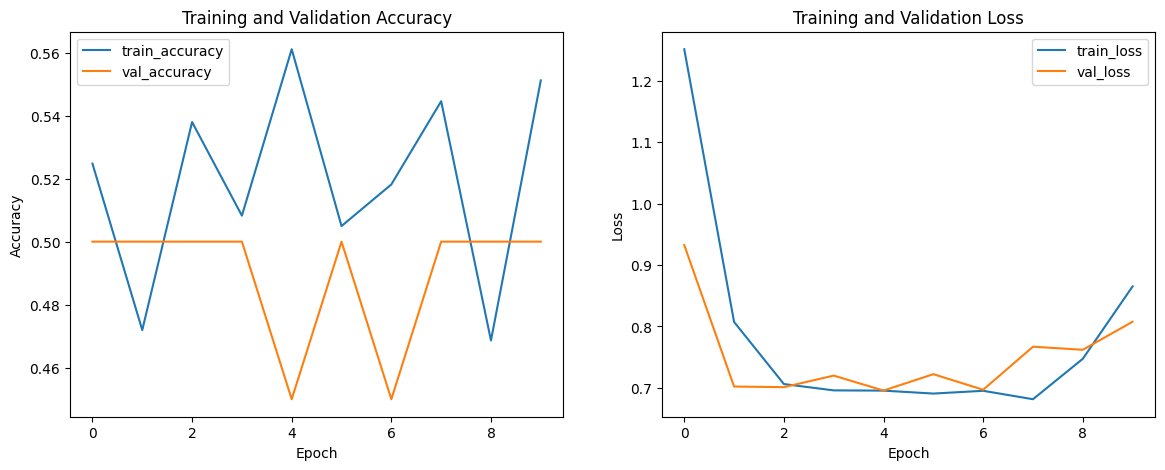

1/1 [==============================] - 4s 4s/step


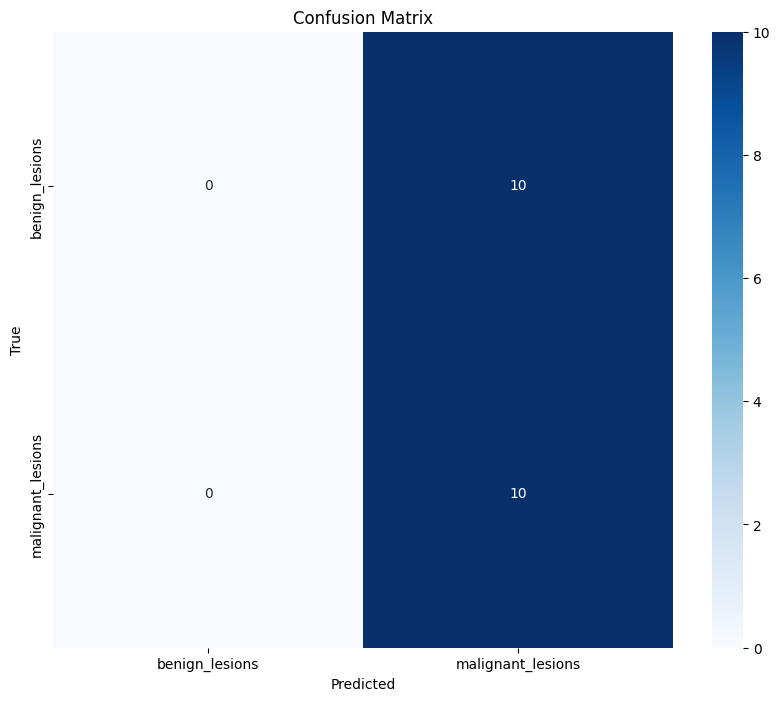

Classification Report
                   precision    recall  f1-score   support

   benign_lesions       0.00      0.00      0.00        10
malignant_lesions       0.50      1.00      0.67        10

         accuracy                           0.50        20
        macro avg       0.25      0.50      0.33        20
     weighted avg       0.25      0.50      0.33        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

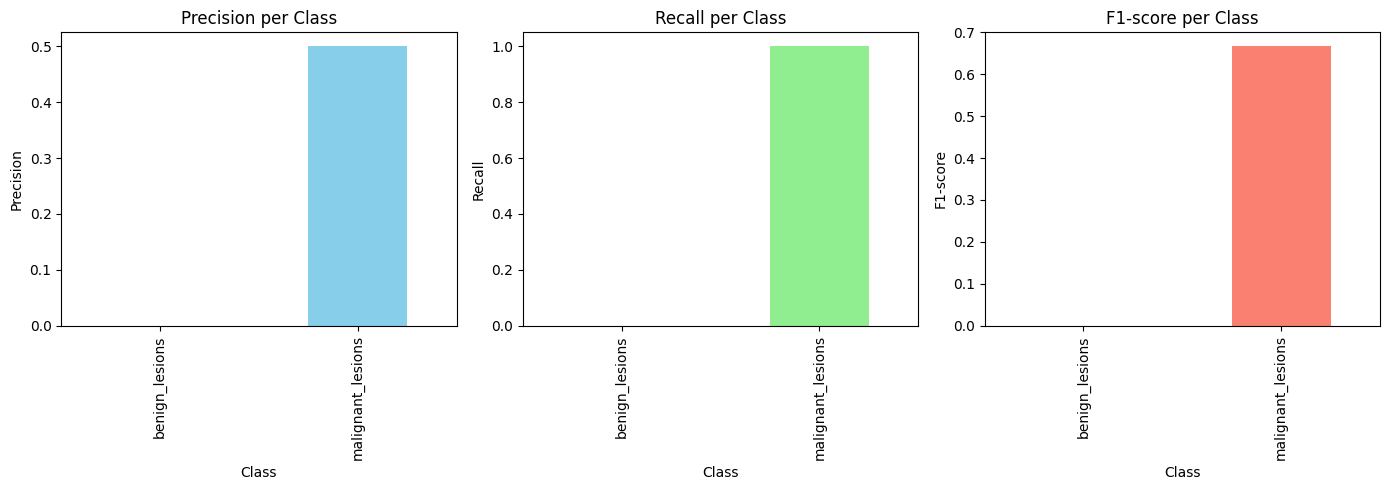

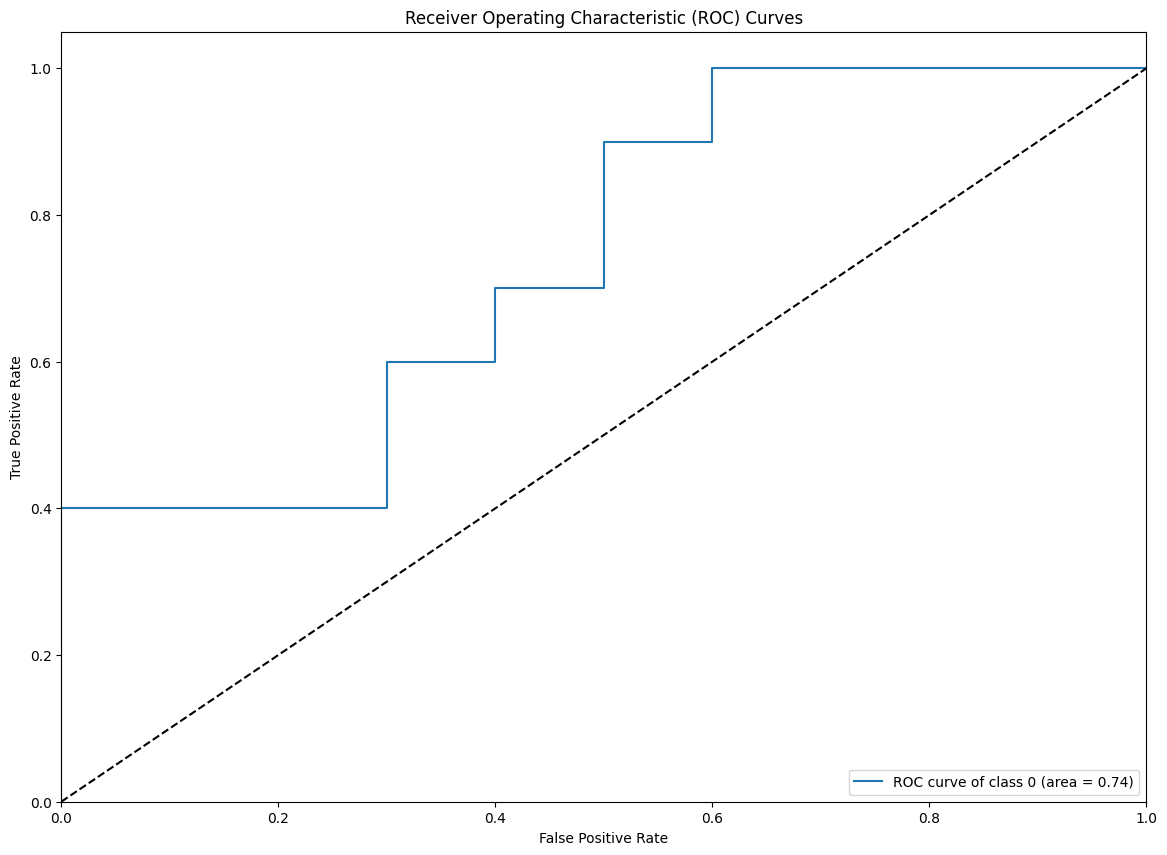

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import tensorflow as tf
import keras as k
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
# Step 3: Define paths
# Replace these paths with your dataset path in Google Drive
train_data_dir = '/content/drive/MyDrive/ORAL_CANCER_DS/train'

validation_data_dir = '/content/drive/MyDrive/ORAL_CANCER_DS/validate'


# Step 4: Image data generators
# Note: Adjust target_size and batch_size according to your dataset
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

# Step 5: Load the ResNet50 model, pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 6: Add custom layers on top of ResNet50
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='sigmoid')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 7: Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Step 8: Compile the model
model.compile(optimizer=Adam(), loss=k.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Step 9: Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# Step 10: Save the model
#model.save('/content/drive/MyDrive/your_model_path/resnet50_model.h5')

# Step 11: Plot performance graphs
# Accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 12: Confusion Matrix and Classification Report
# Predict the values from the validation dataset
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
cm_plot_labels = list(validation_generator.class_indices.keys())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=cm_plot_labels))

# Additional performance graphs
# Precision, Recall, and F1-score for each class
report = classification_report(validation_generator.classes, y_pred, target_names=cm_plot_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(14, 5))

# Precision
plt.subplot(1, 3, 1)
report_df['precision'][:-3].plot(kind='bar', color='skyblue')
plt.title('Precision per Class')
plt.xlabel('Class')
plt.ylabel('Precision')

# Recall
plt.subplot(1, 3, 2)
report_df['recall'][:-3].plot(kind='bar', color='lightgreen')
plt.title('Recall per Class')
plt.xlabel('Class')
plt.ylabel('Recall')

# F1-score
plt.subplot(1, 3, 3)
report_df['f1-score'][:-3].plot(kind='bar', color='salmon')
plt.title('F1-score per Class')
plt.xlabel('Class')
plt.ylabel('F1-score')

plt.tight_layout()
plt.show()

# ROC Curves for each class (optional, requires binary classification or one-vs-rest approach)
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_val_bin = label_binarize(validation_generator.classes, classes=range(train_generator.num_classes))
n_classes = y_val_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_bin[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(14, 10))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("on")

NameError: name 'dataset' is not defined

<Figure size 1500x1500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'train_generator' from your previous code is the dataset you want to visualize
dataset = train_generator

plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(dataset.batch_size):  # Use batch size from the generator
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(dataset.class_indices) # Assuming you want to display class indices as titles
        plt.axis("on")
plt.show()

NameError: name 'train_generator' is not defined

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

NameError: name 'plt' is not defined

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

In [ ]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in train_data_dir.take(1):
    for i in range(32):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("on")

AttributeError: 'str' object has no attribute 'take'

<Figure size 1500x1500 with 0 Axes>

IsADirectoryError: [Errno 21] Is a directory: '/'

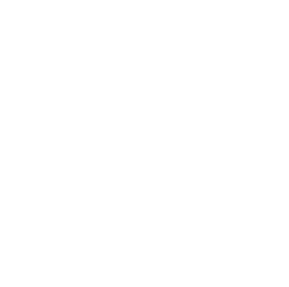

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
#train_cat_fnames = os.listdir( train_cats_dir )
#train_dog_fnames = os.listdir( train_dogs_dir )


#next_cat_pix = [os.path.join(train_data_dir, fname)
 #               for fname in train_cat_fnames[ pic_index-8:pic_index]
  #             ]

#next_dog_pix = [os.path.join(train_dogs_dir, fname)
 #               for fname in train_dog_fnames[ pic_index-8:pic_index]
  #             ]

for i, img_path in enumerate(train_data_dir+validation_data_dir):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()
